**Sentimental Analysis** is a field of NLP used to decide the kind of emotion expressed within text.

Here we classify types of review based on emotion(Positive,Negative,Neutral).

In [1]:
# importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read Data

In [2]:
data = pd.read_csv("./googleplaystore_user_reviews.csv")

Take a look at the data !

In [3]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


We need only the Translated_Review and Sentiment columns. Lets get it.

In [4]:
df = pd.concat([data['Translated_Review'],data['Sentiment']],axis=1)
df.shape

(64295, 2)

Check the number of null values present.

In [5]:
df.isna().sum()

Translated_Review    26868
Sentiment            26863
dtype: int64

Drop the rows with null values

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.shape

(37427, 2)

Our target "Sentiment" is of 3 types : Positive, Negative, Neutral

In [8]:
df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

We convert it to the our desired form

In [9]:
df.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in df.Sentiment]

Text(0.5,1,'Count of Sentiments')

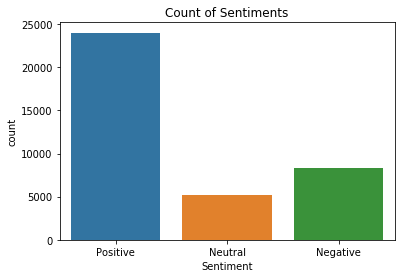

In [51]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data.Sentiment)
plt.title("Count of Sentiments")

**Data Preprocessing**<br>

We use NLP to pre-process the data<br>
**Natural language processing** (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.<br>

Our steps are:<br>
   <li>Tokenization
   <li>Stopwords
   <li>Lemmatazation/Stemming
   <li>Vectorization

In [31]:
df.Translated_Review[0]

'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'

The values in the Translated_Review column has some characters which are not letters. They need to be removed.Let's try for a first row

In [42]:
import re
first_text=df.Translated_Review[0]
text=re.sub("[^a-zA-Z]"," ",first_text) #replacing every character other than alphabets, with space
text=text.lower()

text now contains a value which contains only letters.

In [43]:
text

'i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  '

Tokenization is done below.<br>
**Tokenization** splits the sentence into words.<br>
We then try to identify the stopwords.<br>
**stopwords** - words like "the" which are not useful and only make our list of words bigger.<br>
We remove these stopwords.

In [44]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# in anaconda prompt: python -m nltk.downloader all
from nltk.corpus import stopwords 
text=nltk.word_tokenize(text) # word_tokenize-separate all words

In [45]:
len(text)

22

In [46]:
text

['i',
 'like',
 'eat',
 'delicious',
 'food',
 'that',
 's',
 'i',
 'm',
 'cooking',
 'food',
 'myself',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'before',
 'shelf',
 'life']

**Identifying Stop Words**
Next, we want to consider the importance of a each word in the sentence. English has a lot of filler words that appear very frequently like “and”, “the”, and “a”. When doing statistics on text, these words introduce a lot of noise since they appear way more frequently than other words. Some NLP pipelines will flag them as stop words —that is, words that you might want to filter out before doing any statistical analysis.<br>
This is done

In [49]:
text = [w for w in text if not w in stopwords.words('english')]

In [50]:
len(text)

15

**Lemmatization**- converts a word to its root form.<br>
It considers raining as rain

In [18]:
import nltk as nlp
# nltk.download('wordnet')
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

'i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life'

Extending the above steps for the entire dataset

In [52]:
text_list=[]
for i in df.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    text = [w for w in text if not w in stopwords.words('english')]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [40]:
text_list

['like eat delicious food cooking food case best food help lot also best shelf life',
 'help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'helpful site help food get',
 'good',
 'useful information amount spelling error question validity information shared fixed star given',
 'thank great app add arthritis eye immunity kidney liver detox food please',
 'greatest ever completely awesome maintain health must ppl love',
 'good health good health first priority',
 'health important world either life think',
 'mr sunita bhati thankful developer make kind app really good healthy food body',
 'useful diabetes age need control sugar thanks',
 'one greatest apps',
 'good nice',
 'healthy really helped',
 'god health',
 'health always top priority mysg',
 'excellent useful',
 'found lot wealth form health',
 'found important',
 'healthy eating',
 'good simply good',
 'test',
 'good',
 'than

**Vectorization**<br>
Here we turn a collection of text documents into numerical feature vectors.<br>
From vectorization we can get a dataframe with the each column representing a word from the bag of words and each row represents a review.So if a word appears in a review then it's count is the value in that row corresponding to that column.

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000  # a random value that we specify as the size of the bag of words
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray() # vectorization
all_words=cou_vec.get_feature_names() # bag of words
print(np.amax(sparce_matrix))

17


In [61]:
words = pd.DataFrame(sparce_matrix,columns=all_words)

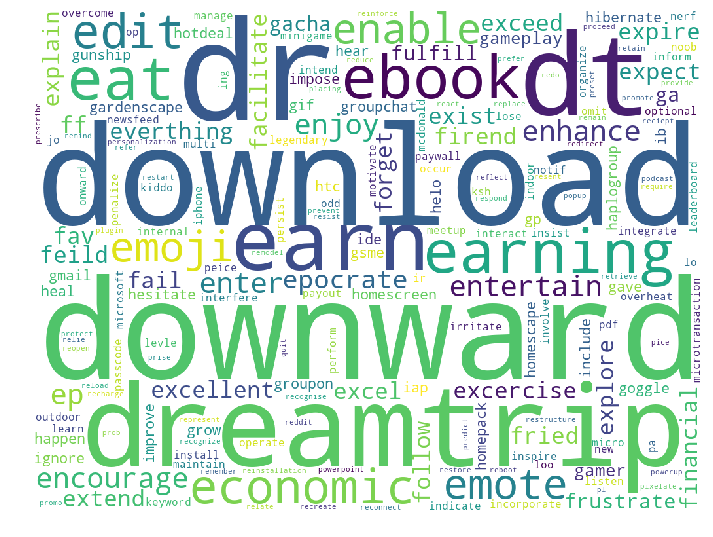

In [77]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(all_words[4500:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
all_words

['aa',
 'aaa',
 'aaaaaaa',
 'aaaaaaaaaa',
 'aaadddsss',
 'aaand',
 'aah',
 'aahhh',
 'aaid',
 'aamiin',
 'aana',
 'aap',
 'aaps',
 'aarav',
 'aargh',
 'aavantage',
 'ab',
 'aback',
 'abad',
 'abandon',
 'abandoned',
 'abandonware',
 'abb',
 'abbi',
 'abbreviate',
 'abbreviated',
 'abc',
 'abcd',
 'abcmouse',
 'abd',
 'abdominal',
 'abducted',
 'abdullah',
 'abdulsallaam',
 'abegail',
 'abet',
 'abhay',
 'abhorrent',
 'abiblity',
 'ability',
 'abit',
 'abke',
 'abl',
 'able',
 'abnb',
 'abnormal',
 'abnormally',
 'abode',
 'abolish',
 'abomination',
 'aborted',
 'aborting',
 'abortion',
 'abou',
 'abousolutely',
 'abracadabra',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutly',
 'absorbing',
 'abstract',
 'abstraction',
 'absurd',
 'abt',
 'abu',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abuser',
 'abusing',
 'abusive',
 'abysmal',
 'abyss',
 'ac',
 'aca',
 'academia',
 'acc',
 'accasionly',
 'accelent',
 'accelerat

Spilting the processed data into train and test

In [24]:
y=df.iloc[:,1].values
x=sparce_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# Logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("lr accuracy: ",lr.score(x_test,y_test))

lr accuracy:  0.9084958589366818


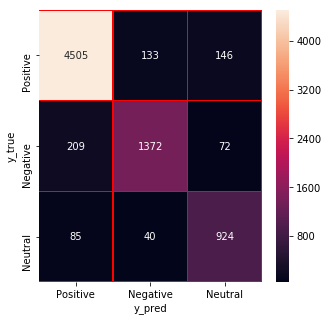

In [82]:
#confussion matrix
y_pred=lr.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [94]:
x_set,y_set = x_train,y_train
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1])

[[-1.   -0.99 -0.98 ...  2.97  2.98  2.99]
 [-1.   -0.99 -0.98 ...  2.97  2.98  2.99]
 [-1.   -0.99 -0.98 ...  2.97  2.98  2.99]
 ...
 [-1.   -0.99 -0.98 ...  2.97  2.98  2.99]
 [-1.   -0.99 -0.98 ...  2.97  2.98  2.99]
 [-1.   -0.99 -0.98 ...  2.97  2.98  2.99]]


ValueError: X has 2 features per sample; expecting 17404

# Neural Networks

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Shilpa\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [87]:
model = Sequential([
    Dense(3, activation='relu',input_shape=(x_train[1].shape)),    # input_shape should be given only 1d
    Dense(3, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [88]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 52215     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 52,227
Trainable params: 52,227
Non-trainable params: 0
_________________________________________________________________


In [89]:
adam = keras.optimizers.adam(lr=0.001)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer = adam,
              metrics = ['accuracy']
             )

In [90]:
history = model.fit(x_train,y_train,epochs = 5, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
29941/29941 [==============================] - 61s 2ms/step - loss: 0.8326 - acc: 0.7139
Epoch 2/5
29941/29941 [==============================] - 14s 467us/step - loss: 0.3975 - acc: 0.8923
Epoch 3/5
29941/29941 [==============================] - 13s 432us/step - loss: 0.2568 - acc: 0.9305
Epoch 4/5
29941/29941 [==============================] - 13s 418us/step - loss: 0.2000 - acc: 0.9460
Epoch 5/5
29941/29941 [==============================] - 13s 429us/step - loss: 0.1655 - acc: 0.9562


In [91]:
testing = model.evaluate(x_test,y_test,verbose=1)

7486/7486 [==============================] - 21s 3ms/step


In [92]:
testing

[0.29788604938439306, 0.9047555436974631]

In [ ]:
print(model.metrics_names)